<a href="https://colab.research.google.com/github/Sagar401/Natural_Language_Processing/blob/master/Word_embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Run this to ensure TensorFlow 2.x is used
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
import pandas as pd
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [0]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [4]:
train_df.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

In [0]:
training_sentences = [ i for i in train_df.text[:6000]]
test_sentences = [i for i in train_df.text[6000:]]
                  
training_labels = [ i for i in train_df.target[:6000]]
test_labels = [i for i in train_df.target[6000:]]


In [0]:
tokenizer = Tokenizer(num_words=10000,oov_token="<OOV>")
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index


In [0]:
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences,padding='post')

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences,padding='post')


In [0]:
import numpy as np

training_padded = np.array(training_padded)
training_labels = np.array(training_labels)

test_padded = np.array(test_padded)
test_labels = np.array(test_labels)

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 32),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
global_average_pooling1d_3 ( (None, 32)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 322,145
Trainable params: 322,145
Non-trainable params: 0
_________________________________________________________________


In [20]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(test_padded, test_labels), verbose=2)

Train on 6000 samples, validate on 1613 samples
Epoch 1/30
6000/6000 - 1s - loss: 0.6347 - accuracy: 0.6368 - val_loss: 0.5714 - val_accuracy: 0.7440
Epoch 2/30
6000/6000 - 1s - loss: 0.4223 - accuracy: 0.8367 - val_loss: 0.4728 - val_accuracy: 0.7886
Epoch 3/30
6000/6000 - 1s - loss: 0.2911 - accuracy: 0.8870 - val_loss: 0.4799 - val_accuracy: 0.7836
Epoch 4/30
6000/6000 - 1s - loss: 0.2218 - accuracy: 0.9173 - val_loss: 0.5409 - val_accuracy: 0.7675
Epoch 5/30
6000/6000 - 1s - loss: 0.1730 - accuracy: 0.9392 - val_loss: 0.6114 - val_accuracy: 0.7495
Epoch 6/30
6000/6000 - 1s - loss: 0.1394 - accuracy: 0.9478 - val_loss: 0.6422 - val_accuracy: 0.7669
Epoch 7/30
6000/6000 - 1s - loss: 0.1172 - accuracy: 0.9567 - val_loss: 0.7034 - val_accuracy: 0.7582
Epoch 8/30
6000/6000 - 1s - loss: 0.1004 - accuracy: 0.9660 - val_loss: 0.8277 - val_accuracy: 0.7607
Epoch 9/30
6000/6000 - 1s - loss: 0.0888 - accuracy: 0.9680 - val_loss: 0.8857 - val_accuracy: 0.7216
Epoch 10/30
6000/6000 - 1s - loss:

In [0]:
import matplotlib.pyplot as plt


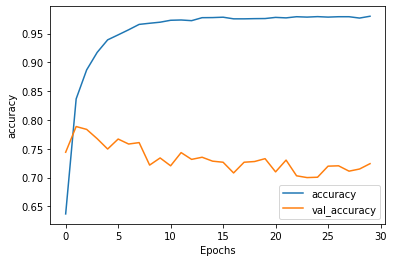

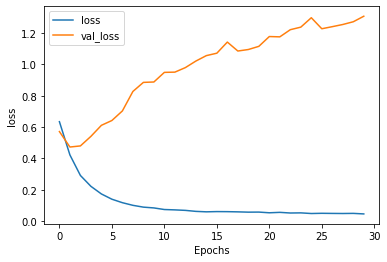

In [22]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [24]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(train_df.target[2])

our deeds are the reason of this earthquake may allah forgive us all ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected
1


In [25]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)


(10000, 32)


In [39]:
sentence = ["granny starting to fear spiders in the garden might be real", "earthquake is in my neighborhood"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, padding='post')
print(model.predict(padded))

[[2.3510468e-06]
 [9.9975461e-01]]
